## Observations and Insights 

   After removing the one mouse with duplicate data points, there are 248 mice in this study. Mouse g989 has been completely removed from the data set because the duplicate time points contain different data points, and there is no way to know which data is correct, if any.
   From the Summary Statistics table, we can see that Capomulin and Ramicane had the highest survival rates, based on the number of timepoints recorded (the timepoint measurements stop if a mouse is dead).  Capomulin and Ramicane also had the smallest average tumor size with the smallest variance among the groups.  This shows that these two drugs are not only the most effective, but also the most consistent.
   The bar chart shows that each drug regimen contained very similar test group sizes, either 24 or 25 mice per group.
   The pie chart shows that an almost equal number of male and female mice were used in the study.
   Based on final tumor volume of the four most promising drugs, only Infubinol contained an outlier within its final tumor volume measurements.  
   The outlier becomes very apparent when we look at the data in a box and whisker plot.  We also see that Capomulin and Ramicane have the smallest tumor sizes and the narrowest range of tumor sizes within the interquartile range.
   By looking at the line plots, we can see that mice treated with Capomulin experienced a steady decline in tumor size.  Mouse s185 in particular showed a more rapid and pronounced decrease in tumor size compared to the others treated with the same drug.
   The scatter plot shows a very strong correlation between mouse weight and tumor size, with an Rvalue of 0.84.  Although the correlation is strong, we cannot say with certainty that one is the cause and the other the effect.  It may be the case that the larger the tumor is, the more weight the tumor adds to the mouse.  Or it may be that the heavier the mouse is to begin with, the larger the tumor grows.
   Overall, we can conclude that Capomulin and Ramicane are the top two contenders for the most effective drug in this trial.


In [610]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df= pd.merge(mouse_metadata, study_results, on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df.head(10)


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
5           33.464577                 1  
6           31.099498                 1  
7           26.546993                 1  
8           24.365505                 1  
9           22.050126                 1

In [611]:
# Checking the number of mice.
count=mouse_df["Mouse ID"].nunique()
count

249

In [612]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# dups= []

# t=2
# for t in range(len("Timepoint")):
#     if ("Timepoint")[t] == ("Timepoint")[t-1]:
#         dups.append(["Mouse ID"][t])
    
# dups

vc= mouse_df.groupby("Mouse ID")["Timepoint"].value_counts()
v= pd.DataFrame(vc)

dups= v.loc[v["Timepoint"]>1, :]
dups

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [613]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse= mouse_df.loc[mouse_df["Mouse ID"]== "g989", :]
duplicate_mouse


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [614]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_df.loc[mouse_df["Mouse ID"]!= "g989"]
clean_df.head(10)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
5           33.464577                 1  
6           31.099498                 1  
7           26.546993                 1  
8           24.365505                 1  
9           22.050126                 1

In [615]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_df["Mouse ID"].value_counts()
len(clean_count)

248

## Summary Statistics

In [616]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import statistics as stats
import numpy as np

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# mean and median
average= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

#variance
vari=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

#standard deviation
sd= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Standard Error of the Mean
sem= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# number of mice
number=clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()

sum_stats= ({
    "Number of Mice Tested": number,
    "Mean": average,
    "Median": med,
    "Variance": vari,
    "Standard Deviation": sd,
    "SEM": sem
})

sum_stats_df= pd.DataFrame(sum_stats)
sum_stats_df

Number of Mice Tested       Mean     Median   Variance  \
Drug Regimen                                                           
Capomulin                        25  40.675741  41.557809  24.947764   
Ceftamin                         25  52.591172  51.776157  39.290177   
Infubinol                        25  52.884795  51.820584  43.128684   
Ketapril                         25  55.235638  53.698743  68.553577   
Naftisol                         25  54.331565  52.509285  66.173479   
Placebo                          25  54.033581  52.288934  61.168083   
Propriva                         24  52.320930  50.446266  43.852013   
Ramicane                         25  40.216745  40.673236  23.486704   
Stelasyn                         24  54.233149  52.431737  59.450562   
Zoniferol                        25  53.236507  51.818479  48.533355   

              Standard Deviation       SEM  
Drug Regimen                                
Capomulin               4.994774  0.329346  
Ceftamin                6.268188  0.469821  
Infubinol               6.567243  0.492236  
Ketapril                8.279709  0.603860  
Naftisol                8.134708  0.596466  
Placebo                 7.821003  0.581331  
Propriva                6.622085  0.544332  
Ramicane                4.846308  0.320955  
Stelasyn                7.710419  0.573111  
Zoniferol               6.966589  0.516398

In [617]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

desc_df= clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [
    "count", "mean", "median", "var", "std", "sem"
]})
desc_df= pd.DataFrame(desc_df)
desc_df=desc_df.rename(columns={"count": "Number of Timepoints (indicator of survival rate)"})
desc_df


Tumor Volume (mm3)             \
             Number of Timepoints (indicator of survival rate)       mean   
Drug Regimen                                                                
Capomulin                                                  230  40.675741   
Ceftamin                                                   178  52.591172   
Infubinol                                                  178  52.884795   
Ketapril                                                   188  55.235638   
Naftisol                                                   186  54.331565   
Placebo                                                    181  54.033581   
Propriva                                                   148  52.320930   
Ramicane                                                   228  40.216745   
Stelasyn                                                   181  54.233149   
Zoniferol                                                  182  53.236507   

                                                        
                 median        var       std       sem  
Drug Regimen                                            
Capomulin     41.557809  24.947764  4.994774  0.329346  
Ceftamin      51.776157  39.290177  6.268188  0.469821  
Infubinol     51.820584  43.128684  6.567243  0.492236  
Ketapril      53.698743  68.553577  8.279709  0.603860  
Naftisol      52.509285  66.173479  8.134708  0.596466  
Placebo       52.288934  61.168083  7.821003  0.581331  
Propriva      50.446266  43.852013  6.622085  0.544332  
Ramicane      40.673236  23.486704  4.846308  0.320955  
Stelasyn      52.431737  59.450562  7.710419  0.573111  
Zoniferol     51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [618]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
reg_and_count= sum_stats_df["Number of Mice Tested"]
reg_and_count= pd.DataFrame(reg_and_count)

reg_and_count.plot(kind="bar", color="blue", figsize=(15,5))
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [619]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis= np.arange(len(reg_and_count))
tick_locations= [value for value in x_axis]

plt.figure(figsize=(15,5))
plt.bar(x_axis, reg_and_count["Number of Mice Tested"])
plt.xticks(tick_locations, reg_and_count.index.values, rotation=45)
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

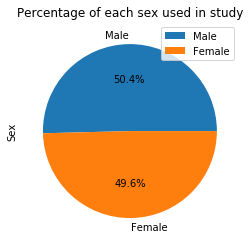

In [620]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=clean_df.groupby("Mouse ID")["Sex"].unique()


#Extra steps to remove brackets from [Male] and [Female]
sex_count= pd.DataFrame(sex_count)
sex_count["Sex"]= sex_count["Sex"].map(lambda x: x[0])
sex_count= sex_count["Sex"]
sex_count= sex_count.value_counts()
sex_count= pd.DataFrame(sex_count)



pi=sex_count.plot.pie(y="Sex", autopct='%1.1f%%')
plt.title("Percentage of each sex used in study")
plt.show()

In [621]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count
explode=(0, .05)
colors= ("blue", "red")
plt.pie(sex_count["Sex"], labels= sex_count.index.values, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title("Percentage of Sexes Used in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [622]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Final tumor volume for each mouse
tumor_last=clean_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last()

# Drug Regimen for each mouse
d_r= clean_df.groupby("Mouse ID")["Drug Regimen"].last()


#Final tumor volume DataFrame
ftv_df= ({
    "Drug Regimen": d_r,
    "Final Tumor Volume (mm3)": tumor_last
})

ftv_df= pd.DataFrame(ftv_df)

ftv_df
# Only Drugs Capomulin, Ramicane, Infubinol, Ceftamin
ftv_df= ftv_df.loc[(ftv_df["Drug Regimen"]=="Capomulin") | (ftv_df["Drug Regimen"]=="Ramicane") |  (ftv_df["Drug Regimen"]=="Infubinol") | (ftv_df["Drug Regimen"]=="Ceftamin")]

ftv_df


Drug Regimen  Final Tumor Volume (mm3)
Mouse ID                                       
a203        Infubinol                 67.973419
a251        Infubinol                 65.525743
a275         Ceftamin                 62.999356
a411         Ramicane                 38.407618
a444         Ramicane                 43.047543
...               ...                       ...
y769         Ceftamin                 68.594745
y793        Capomulin                 31.896238
y865         Ceftamin                 64.729837
z578         Ramicane                 30.638696
z581        Infubinol                 62.754451

[100 rows x 2 columns]

In [623]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_data=[]

for drug in drugs:
    x=ftv_df.loc[ftv_df["Drug Regimen"]== drug,"Final Tumor Volume (mm3)"]
    drug_data.append(x)
        
drug_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_iqr=st.iqr(drug_data[0])
cap_upbound=(np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.75)+ (capomulin_iqr * 1.5))
cap_lowbound=(np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.25) - (capomulin_iqr * 1.5))

ramicane_iqr=st.iqr(drug_data[1])
ram_upbound=(np.quantile(ram_df["Final Tumor Volume (mm3)"], 0.75)+ (ramicane_iqr * 1.5))
ram_lowbound=(np.quantile(ram_df["Final Tumor Volume (mm3)"], 0.25) - (ramicane_iqr * 1.5))

infubinol_iqr=st.iqr(drug_data[2])
inf_upbound=(np.quantile(inf_df["Final Tumor Volume (mm3)"], 0.75)+ (infubinol_iqr * 1.5))
inf_lowbound=(inf_df["Final Tumor Volume (mm3)"].quantile(0.25)) - (infubinol_iqr * 1.5)

ceftamin_iqr=st.iqr(drug_data[3])
cef_upbound=(np.quantile(cef_df["Final Tumor Volume (mm3)"], 0.75)+ (ceftamin_iqr * 1.5))
cef_lowbound=(np.quantile(cef_df["Final Tumor Volume (mm3)"], 0.25) - (ceftamin_iqr * 1.5))


    

    # Determine outliers using upper and lower bounds
capomulin_outliers= ftv_df.loc[(ftv_df["Drug Regimen"]== "Capomulin") &((ftv_df["Final Tumor Volume (mm3)"]> cap_upbound) | (ftv_df["Final Tumor Volume (mm3)"]< cap_lowbound))]

ramicane_outliers= ftv_df.loc[(ftv_df["Drug Regimen"]== "Ramicane") &((ftv_df["Final Tumor Volume (mm3)"]> ram_upbound) | (ftv_df["Final Tumor Volume (mm3)"]< ram_lowbound))]

infubinol_outliers= ftv_df.loc[(ftv_df["Drug Regimen"]== "Infubinol") &((ftv_df["Final Tumor Volume (mm3)"]> inf_upbound) | (ftv_df["Final Tumor Volume (mm3)"]< inf_lowbound))]

ceftamin_outliers= ftv_df.loc[(ftv_df["Drug Regimen"]== "Ceftamin") &((ftv_df["Final Tumor Volume (mm3)"]> cef_upbound) | (ftv_df["Final Tumor Volume (mm3)"]< cef_lowbound))]

outliers_df= pd.DataFrame({
    "Capomulin": len(capomulin_outliers),
    "Ramicane": len(ramicane_outliers),
    "Infubinol": len(infubinol_outliers),
    "Ceftamin": len(ceftamin_outliers)},
    index=[0])

outliers_df



Capomulin  Ramicane  Infubinol  Ceftamin
0          0         0          1         0

In [624]:
# experimenting with dataframe procedure options
outliers_df= pd.DataFrame({
    "Capomulin": capomulin_outliers.count(),
    "Ramicane": ramicane_outliers.count(),
    "Infubinol": infubinol_outliers.count(),
    "Ceftamin": ceftamin_outliers.count()})
outliers_df

Capomulin  Ramicane  Infubinol  Ceftamin
Drug Regimen                      0         0          1         0
Final Tumor Volume (mm3)          0         0          1         0

In [625]:
# Another way to do the same thing as the previous cell


cap_df= ftv_df.loc[ftv_df["Drug Regimen"]=="Capomulin"]
cap_df

ram_df= ftv_df.loc[ftv_df["Drug Regimen"]=="Ramicane"]
ram_df

inf_df= ftv_df.loc[ftv_df["Drug Regimen"]=="Infubinol"]
inf_df

cef_df= ftv_df.loc[ftv_df["Drug Regimen"]=="Ceftamin"]
cef_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_iqr=st.iqr(cap_df["Final Tumor Volume (mm3)"])
cap_med= cap_df["Final Tumor Volume (mm3)"].median()

cap_iqr
cap_med
# Find 1st and 3rd Quartile
cap_3_quart=np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.75) 
cap_1_quart=np.quantile(cap_df["Final Tumor Volume (mm3)"], 0.25)
#Outliers
cap_upper_limit= cap_3_quart + (cap_iqr*1.5)
cap_lower_limit=cap_1_quart - (cap_iqr*1.5)

cap_upper_limit
cap_lower_limit


box_list=[
    cap_df["Final Tumor Volume (mm3)"],
    ram_df["Final Tumor Volume (mm3)"],
    inf_df["Final Tumor Volume (mm3)"],
    cef_df["Final Tumor Volume (mm3)"]
]
box_list

[Mouse ID
 b128    38.982878
 b742    38.939633
 f966    30.485985
 g288    37.074024
 g316    40.159220
 i557    47.685963
 i738    37.311846
 j119    38.125164
 j246    38.753265
 l509    41.483008
 l897    38.846876
 m601    28.430964
 m957    33.329098
 r157    46.539206
 r554    32.377357
 r944    41.581521
 s185    23.343598
 s710    40.728578
 t565    34.455298
 u364    31.023923
 v923    40.658124
 w150    39.952347
 w914    36.041047
 x401    28.484033
 y793    31.896238
 Name: Final Tumor Volume (mm3), dtype: float64,
 Mouse ID
 a411    38.407618
 a444    43.047543
 a520    38.810366
 a644    32.978522
 c458    38.342008
 c758    33.397653
 d251    37.311236
 e662    40.659006
 g791    29.128472
 i177    33.562402
 i334    36.374510
 j913    31.560470
 j989    36.134852
 k403    22.050126
 m546    30.564625
 n364    31.095335
 q597    45.220869
 q610    36.561652
 r811    37.225650
 r921    43.419381
 s508    30.276232
 u196    40.667713
 w678    43.166373
 y449    44.183451


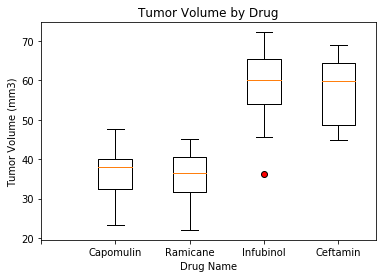

In [627]:
red_dot= dict(markerfacecolor="r", marker="o")
plt.boxplot(box_list, flierprops=red_dot)
plt.title("Tumor Volume by Drug")
xlabels=[" ", "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
x_axis= np.arange(len(xlabels))
#tick_locations= [value for value in x_axis]
plt.xticks(x_axis, labels=xlabels)
plt.xlabel("Drug Name")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



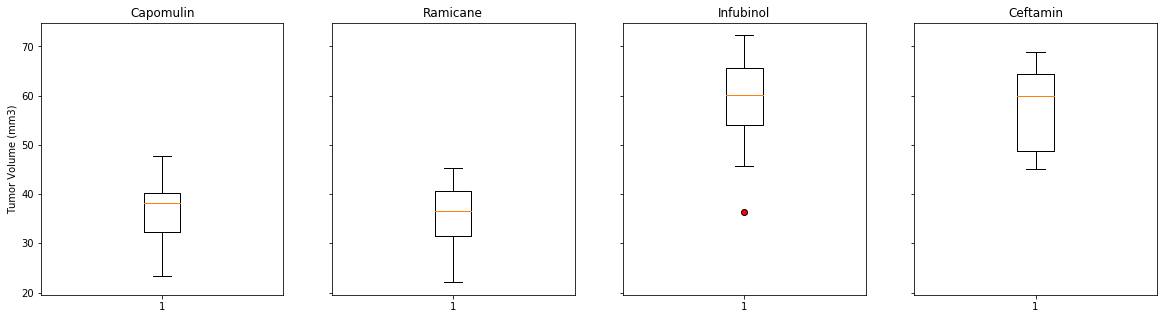

In [628]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax= plt.subplots(1,4, figsize=(20,5), sharey=True)

ax[0].boxplot(cap_df["Final Tumor Volume (mm3)"])
ax[0].set_title("Capomulin")
ax[0].set_ylabel("Tumor Volume (mm3)")

ax[1].boxplot(ram_df["Final Tumor Volume (mm3)"])
ax[1].set_title("Ramicane")

ax[2].boxplot(inf_df["Final Tumor Volume (mm3)"], flierprops=red_dot)
ax[2].set_title("Infubinol")

ax[3].boxplot(cef_df["Final Tumor Volume (mm3)"])
ax[3].set_title("Ceftamin")

plt.show()

## Line and Scatter Plots

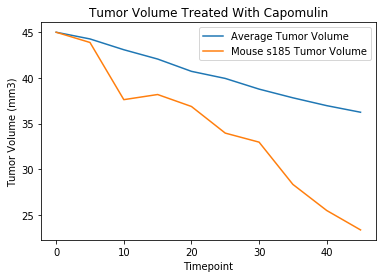

In [629]:
timepoints= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tp_data=[]

#create list of timepoint data
for each_time in timepoints:
    t= clean_cap.loc[clean_cap["Timepoint"]== each_time, "Tumor Volume (mm3)"]
    tp_data.append(t)

# create list of averages
points=[0,1,2,3,4,5,6,7,8,9]
tp_means=[]
for p in points:
    a=tp_averages[p].mean()
    tp_means.append(a)
    
#create list of data for mouse s185
s185=clean_cap_mouse["Tumor Volume (mm3)"]

z=pd.DataFrame({
    "Timepoint": timepoints,
    "Average Tumor Volume": tp_means,
    "Mouse s185 Tumor Volume": s185
})
z=z.set_index("Timepoint")
z.plot()
plt.title("Tumor Volume Treated With Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

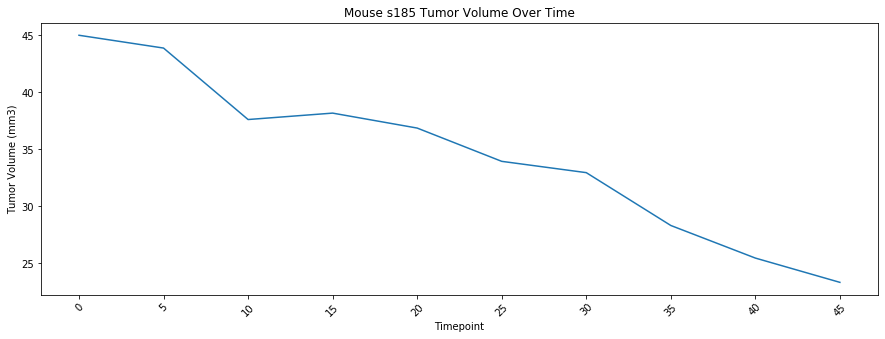

In [631]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_cap=clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
clean_cap_mouse= clean_cap.loc[clean_cap["Mouse ID"]== "s185"]
clean_cap_mouse

x_axis= np.arange(len(clean_cap_mouse["Timepoint"]))
tick_locations= [value for value in x_axis]
xlabels= clean_cap_mouse["Timepoint"]

plt.figure(figsize=(15,5))
plt.plot(x_axis, clean_cap_mouse["Tumor Volume (mm3)"])
plt.xticks(tick_locations, clean_cap_mouse["Timepoint"], rotation=45)
plt.title("Mouse s185 Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [632]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight=clean_cap.groupby("Mouse ID")["Weight (g)"].mean()
average_tumor_volume= clean_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_tumor_volume, color="red")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.show()

## Correlation and Regression

The Correlation Coefficient is 0.8419363424694717


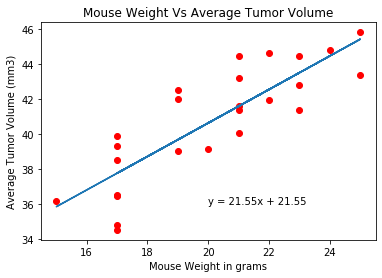

In [634]:
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
rvalue=st.pearsonr(weight, average_tumor_volume)
rvalue
r_value=np.corrcoef(weight, average_tumor_volume)
print( "The Correlation Coefficient is " + str(rvalue[0]))

plt.scatter(weight, average_tumor_volume, color="red")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume")


x_values= weight
y_values= average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_values, regress_values)
plt.annotate(line_eq, (20,36))
plt.show()